In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep = ',', header = 'infer')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df = df.drop('id', axis=1)  #id is irrelevant

KeyError: "['id'] not found in axis"

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
df[df.isna().any(axis = 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [28]:
# Check for non-numeric values in 'bmi' column
print(df['bmi'].unique())

# Attempt to convert 'bmi' column to numeric, coercing errors to NaN
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Calculate the mean of 'bmi' column, ignoring NaN values
df['bmi'].mean(axis=0, skipna=True)

[36.6
 <bound method NDFrame._add_numeric_operations.<locals>.mean of 0       36.6
 1        NaN
 2       32.5
 3       34.4
 4       24.0
         ...
 5105     NaN
 5106    40.0
 5107    30.6
 5108    25.6
 5109    26.2
 Name: bmi, Length: 5110, dtype: float64>
 32.5 34.4 24.0 29.0 27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9 37.5 25.8
 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5 33.7 23.1
 32.0 29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8
 40.4 25.3 30.2 47.5 20.3 30.0 28.9 28.1 31.1 21.7 27.0 24.1 45.9 44.1
 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.0 28.8 34.6 19.4
 30.3 41.5 22.6 56.6 27.1 31.3 31.0 31.7 35.8 28.4 20.1 26.7 38.7 34.9
 25.0 23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7 34.2 23.6
 22.3 37.1 45.0 25.5 30.8 37.4 34.5 27.9 29.5 46.0 42.5 35.5 26.9 45.5
 31.5 33.0 23.4 30.7 20.5 21.5 40.0 28.6 42.2 29.6 35.4 16.9 26.8 39.3
 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18.0 17.6 19.1 50.1 17.7 54.6
 35.0 22.0 39.4 19.7 22.5 

28.893236911794666

In [29]:
df.bmi = df.bmi.fillna(df['bmi'].mean(axis=0, skipna=True))

In [30]:
df[df.isna().any(axis = 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [31]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [32]:
correlation = df.corr(numeric_only = True)

<Axes: >

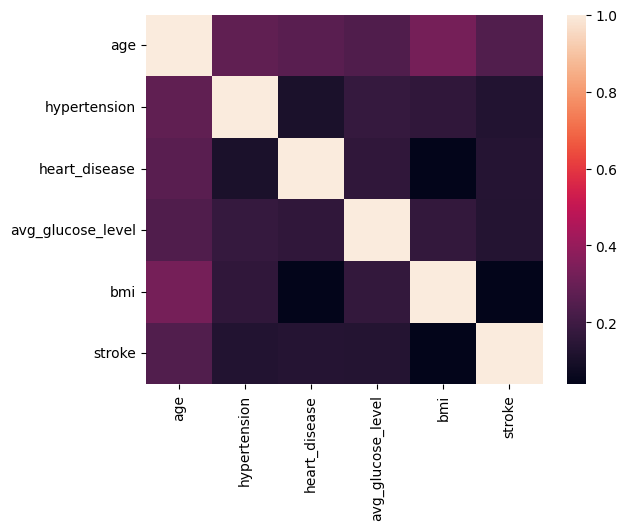

In [33]:
import seaborn as sns
sns.heatmap(correlation)

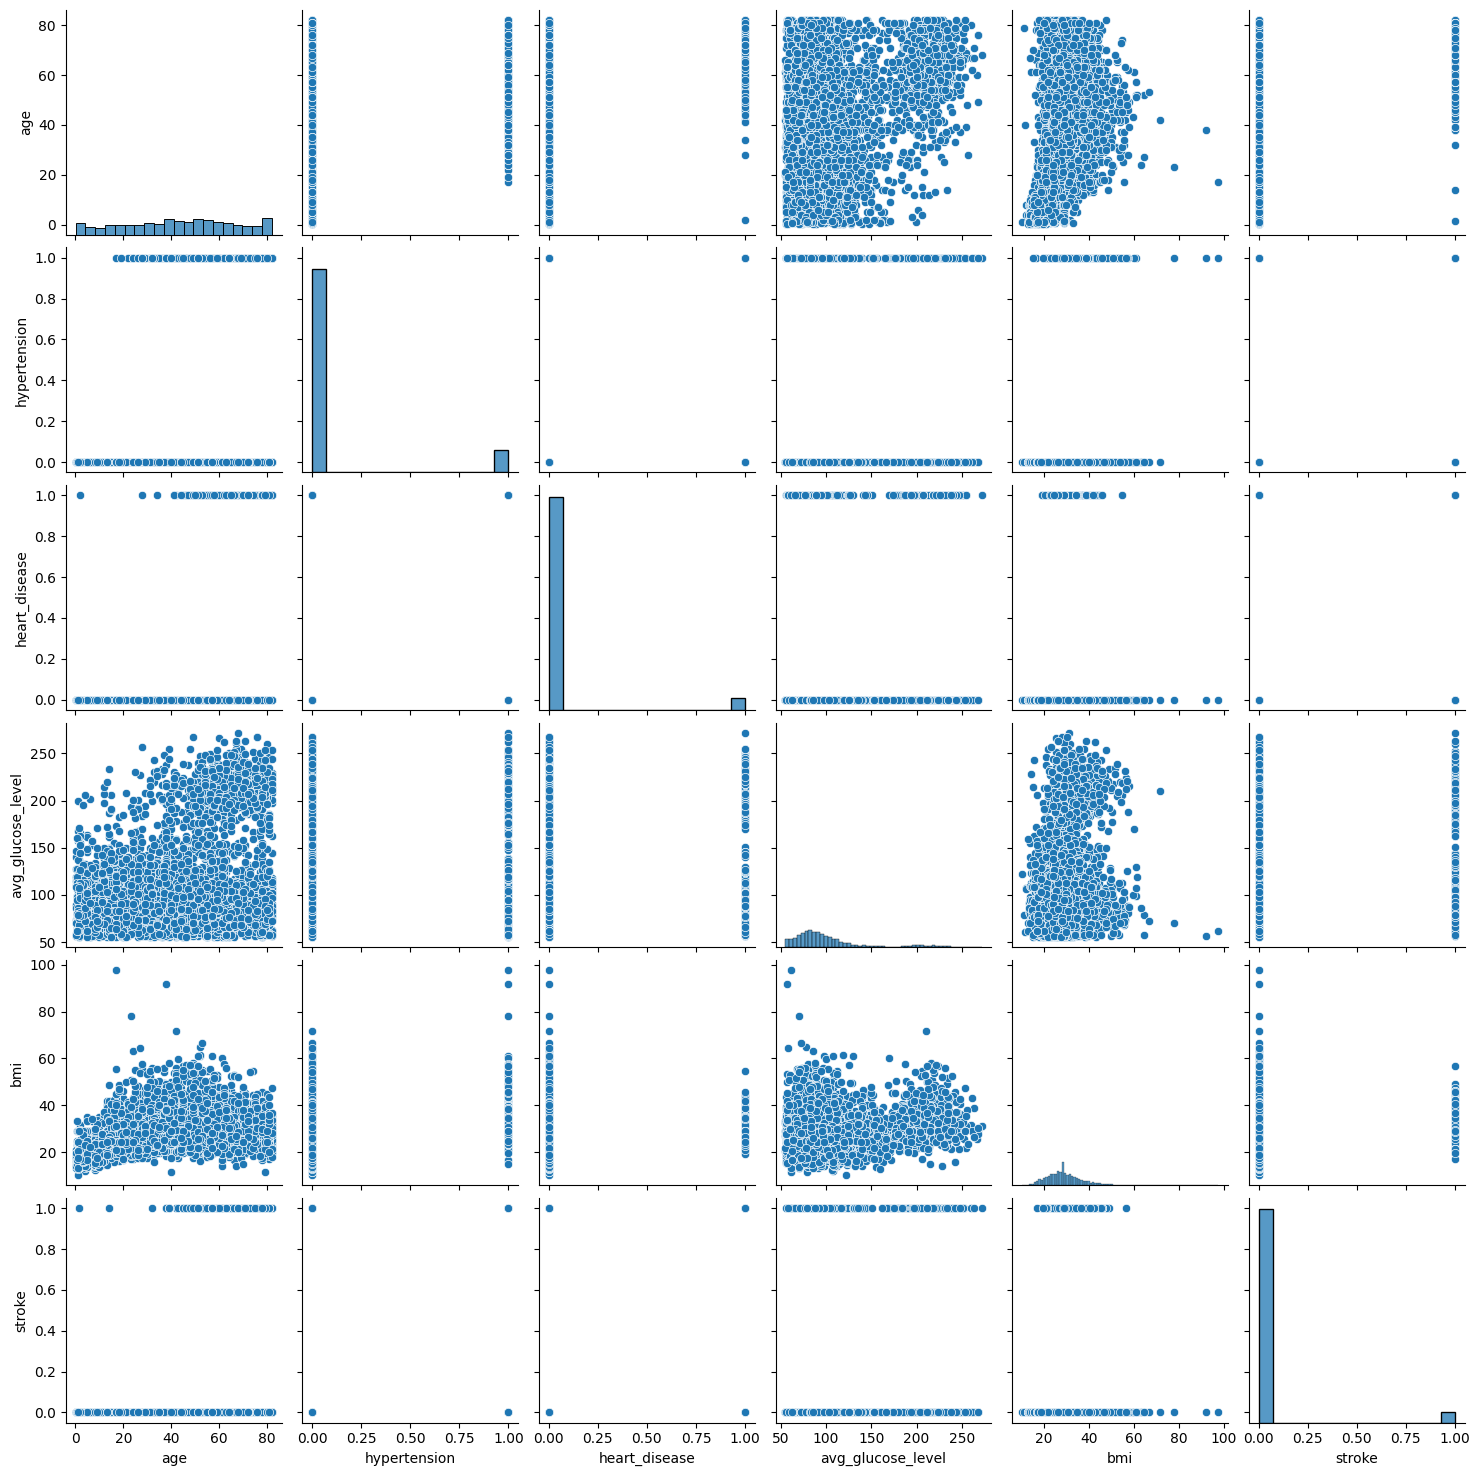

In [34]:
sns.pairplot(df)

In [35]:
#Data is imbalanced. Therefore, metric chosen for optimization is 'recall' to reduce type II error.

In [41]:
df = pd.get_dummies(df, dtype = 'int8')
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,0,0,125.20,40.000000,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,82.99,30.600000,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   bool   
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_No                 5110 non-null   bool   
 10  ever_married_Yes                5110 non-null   bool   
 11  work_type_Govt_job              5110 non-null   bool   
 12  work_type_Never_worked          51

In [40]:
column_names = [
'gender_Female',
'gender_Male',
'gender_Other',
'ever_married_No',
'ever_married_Yes',
'work_type_Govt_job',
'work_type_Never_worked',
'work_type_Private',
'work_type_Self-employed',
'work_type_children',
'Residence_type_Rural',
'Residence_type_Urban',
'smoking_status_Unknown',
'smoking_status_formerly smoked',
'smoking_status_never smoked',
'smoking_status_smokes'
]
df[column_names].replace(['False', 'True '],[0, 1], inplace=True)
df

<ipython-input-40-0753e273aab7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_names].replace(['False', 'True '],[0, 1], inplace=True)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,0,0,125.20,40.000000,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,82.99,30.600000,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [44]:
file_name = 'clean_stroke_data.xlsx'
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
